In [2]:
#importing libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


Reading data and Cleaning of data

In [3]:
#skipping first line of the dataset as it is header 
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', skiprows=1)
#drop null columns always reset the index of the dataset
df = df.dropna().reset_index(drop=True)
#showing 0-->123 index
df.head(123)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,27,09,2012,31,66,11,0,85.7,8.3,24.9,4,9,4.1,fire
119,28,09,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire


In [4]:
#adding new column named region there are 2 types of region so 1st type=0 2nd type=1
df['Region']=0
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,0
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,0
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,0
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,0
243,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,0


In [5]:
#updating 2nd type fregion as 1
df.loc[123:, 'Region'] = 1
df.head(124)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,28,09,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,0
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,0


In [6]:
#droping 122 index as it contains 122	day	month	year	Temperature	RH	Ws	Rain	FFMC	DMC	DC	ISI	BUI	FWI	Classes	0 and also updating the index it is important
df=df.drop(index=122).reset_index(drop=True)
df.head(126)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1


In [7]:
#renaming the columns as it contains many spaces in the column names
new_columns = ['Day', 'Month', 'Year', 'Temp', 'Humidity', 'WindSpeed', 'Rainfall', 
               'FFMC_Index', 'DMC_Index', 'DC_Index', 'ISI_Index', 'BUI_Index', 
               'FWI_Index', 'Fire_Class', 'Region']
df.columns=new_columns
df.columns

Index(['Day', 'Month', 'Year', 'Temp', 'Humidity', 'WindSpeed', 'Rainfall',
       'FFMC_Index', 'DMC_Index', 'DC_Index', 'ISI_Index', 'BUI_Index',
       'FWI_Index', 'Fire_Class', 'Region'],
      dtype='object')

In [8]:
#updating the datatypes of the columns
df['Day'] = df['Day'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)
df['Temp']=df['Temp'].astype(int)
df['Humidity']=df['Humidity'].astype(int)
df['WindSpeed']=df['WindSpeed'].astype(int)
df['Region']=df['Region'].astype(int)

df.dtypes



Day            int32
Month          int32
Year           int32
Temp           int32
Humidity       int32
WindSpeed      int32
Rainfall      object
FFMC_Index    object
DMC_Index     object
DC_Index      object
ISI_Index     object
BUI_Index     object
FWI_Index     object
Fire_Class    object
Region         int32
dtype: object

In [9]:
#updating datatype as float but by code not manually
for column in df.columns:
  if df[column].dtype=='object' and column!='Fire_Class':
    df[column]=df[column].astype(float)

In [10]:
#encoding fire=1 no_fire=0 by coding techniques
for index in df.index:
    if 'not fire' in df.loc[index, 'Fire_Class']  :
        df.loc[index, 'Fire_Class'] = 0
    else:
        df.loc[index, 'Fire_Class'] = 1




In [11]:
#changing the fire_class data type aa it was object chnaging to integer
df['Fire_Class']=df['Fire_Class'].astype(int)
#saving cleaned dataset in an another file
df.to_csv('Cleaned_dataset.csv',index=False)


Data Cleaning Process Completed


Data Visualization (EDA)->(Exploratory Data Analysis)

In [12]:
#deleting those features not needed vfor the implementation of the model
df_eda = df.drop(columns=['Day', 'Month','Year'])


Text(0.5, 1.0, 'Correlation Heatmap')

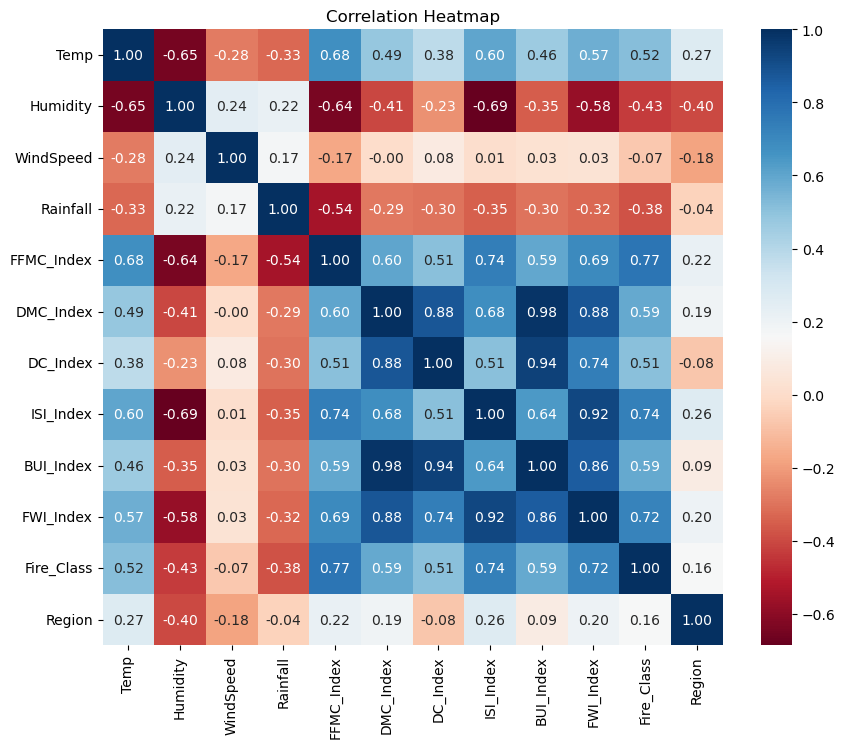

In [13]:
#storing correlational value in the matrix_corr 
matrix_corr=df_eda.corr()
#to visualise this correlation using seaborn  
plt.figure(figsize=(10, 8))
sns.heatmap(matrix_corr, annot=True, cmap='RdBu', fmt=".2f")
#Show the plot
plt.title('Correlation Heatmap')

array([[<Axes: title={'center': 'Temp'}>,
        <Axes: title={'center': 'Humidity'}>,
        <Axes: title={'center': 'WindSpeed'}>],
       [<Axes: title={'center': 'Rainfall'}>,
        <Axes: title={'center': 'FFMC_Index'}>,
        <Axes: title={'center': 'DMC_Index'}>],
       [<Axes: title={'center': 'DC_Index'}>,
        <Axes: title={'center': 'ISI_Index'}>,
        <Axes: title={'center': 'BUI_Index'}>],
       [<Axes: title={'center': 'FWI_Index'}>,
        <Axes: title={'center': 'Fire_Class'}>,
        <Axes: title={'center': 'Region'}>]], dtype=object)

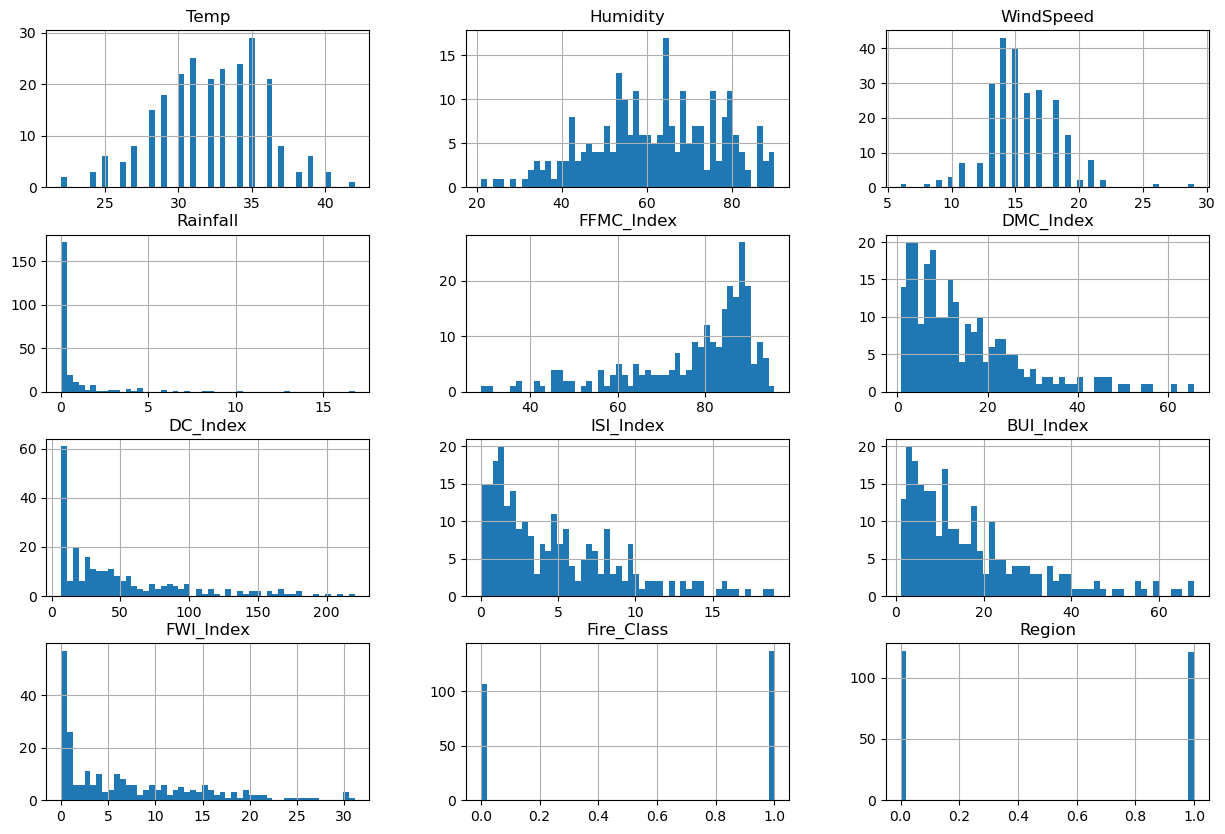

In [14]:
#plotting histogram corresponding the dependent features
df_eda.hist(bins=50, figsize=(15, 10))

Fire_Class
1    56.378601
0    43.621399
Name: proportion, dtype: float64


<Axes: ylabel='count'>

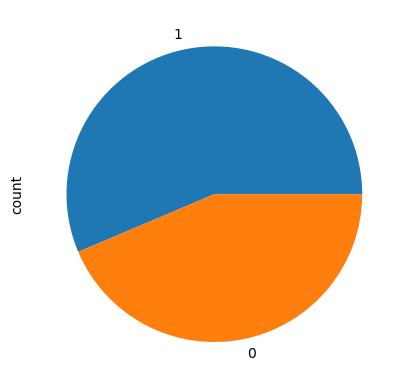

In [15]:
#in the data how many fires and not fires that is represented through the percentage values
print(df_eda['Fire_Class'].value_counts(normalize=True)*100)
#showing that percentage through piechart
df_eda['Fire_Class'].value_counts().plot.pie()

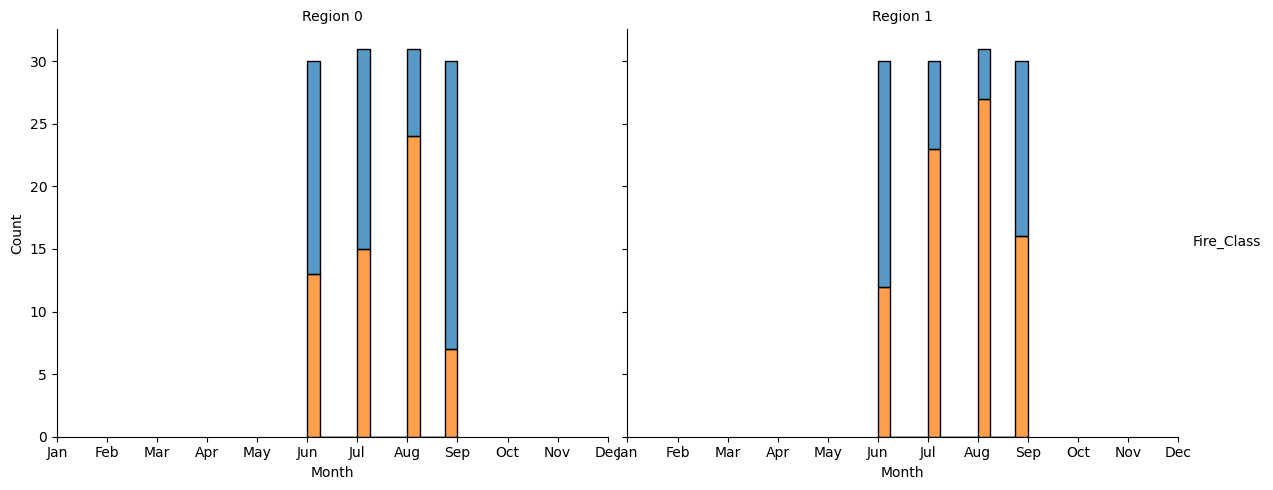

In [16]:

g = sns.FacetGrid(df, col='Region', height=5, aspect=1.2)

# Map the histogram for each region
g.map_dataframe(sns.histplot, x='Month', hue='Fire_Class', multiple='stack', bins=12)

# Add titles and labels
g.set_titles("Region {col_name}")
g.set_axis_labels("Month", "Count")
g.add_legend(title='Fire_Class')

# Optional: Replace month numbers with month names if desired
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
g.set(xticks=range(1, 13), xticklabels=month_labels)


EDA ended this part is mostly taken from CHATGPT

Feature Selection and Model Training 

In [17]:
#first chosing dependednt and independed features

# it is independent features set basically created by droping the dependent column 
X=df_eda.drop(columns='FWI_Index',axis=1)

#it is dependent feature(FWI_Index)
y=df_eda['FWI_Index']

In [18]:
X.head()

,Temp,Humidity,WindSpeed,Rainfall,FFMC_Index,DMC_Index,DC_Index,ISI_Index,BUI_Index,Fire_Class,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [19]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI_Index, Length: 243, dtype: float64

In [20]:
#Test train split 0.25 for testing 
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

Feature Selection Started

In [21]:
#feature selection based on correlation matrix
matrix_corr

,Temp,Humidity,WindSpeed,Rainfall,FFMC_Index,DMC_Index,DC_Index,ISI_Index,BUI_Index,FWI_Index,Fire_Class,Region
Temp,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
Humidity,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
WindSpeed,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rainfall,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC_Index,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC_Index,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC_Index,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI_Index,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI_Index,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI_Index,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


In [22]:
#defining a function for selecting a feature which have a greater threshold value than passed
#basically i will identify those features which are correalted among themselves but not with the target value and adding those in a set and returning them and deleting them from the dataset for a great model thats how feature enginnering works for multicolinearity system
def feature_selection_funciton(dataset,threshold):
  ans=set()
  correlation_val=dataset.corr()
  for i in range(len(correlation_val.columns)):
    for j in range(i):
      if abs(correlation_val.iloc[i,j])>threshold:
        col_name=correlation_val.columns[i]
        ans.add(col_name)
  return ans


In [23]:
#passing the value of threshold as 0.85 but this threshold is selected by domain expert
droping_features=feature_selection_funciton(X_train,0.85)  #0.85 is threshold value

In [24]:
#droping features more than 0.85 correlation from training and test data 
X_train.drop(droping_features,axis=1,inplace=True)
X_test.drop(droping_features,axis=1,inplace=True)

Feature Selection Completed

Model Training Starting 

In [25]:
#standardization process scaling the data as using big data may cause problem so scaling them into a similar kind of  value for faster convergence of regression function
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train_transformed=scaler.fit_transform(X_train)

X_test_transformed=scaler.transform(X_test)

Linear Regression Model

Mean absolute error : 0.5468236465249977
R2 score : 0.9847657384266952


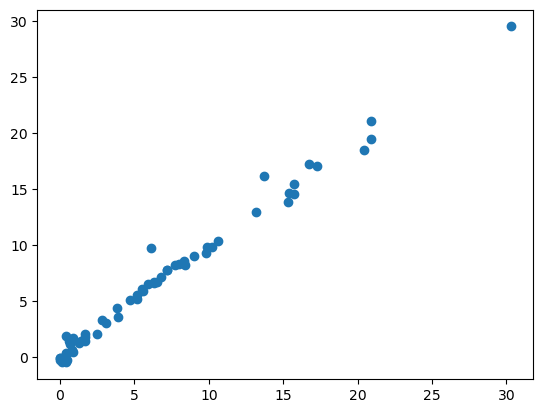

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error

linear_regression_model=LinearRegression()

linear_regression_model.fit(X_train_transformed,y_train)

y_pred=linear_regression_model.predict(X_test_transformed)

mae=mean_absolute_error(y_test,y_pred)

score=r2_score(y_test,y_pred)

print("Mean absolute error :",mae)
print("R2 score :",score)


plt.scatter(y_test,y_pred)

Lasso Regression

Mean absolute error : 1.1331759949144087
R2 score : 0.9492020263112388


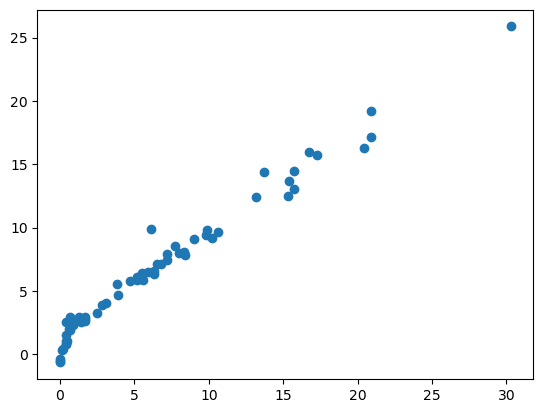

In [27]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_absolute_error

lasso_regression_model=Lasso()

lasso_regression_model.fit(X_train_transformed,y_train)

y_pred=lasso_regression_model.predict(X_test_transformed)

mae=mean_absolute_error(y_test,y_pred)

score=r2_score(y_test,y_pred)

print("Mean absolute error :",mae)
print("R2 score :",score)

plt.scatter(y_test,y_pred)

Ridge Regression Model

Mean absolute error : 0.5642305340105683
R2 score : 0.9842993364555513


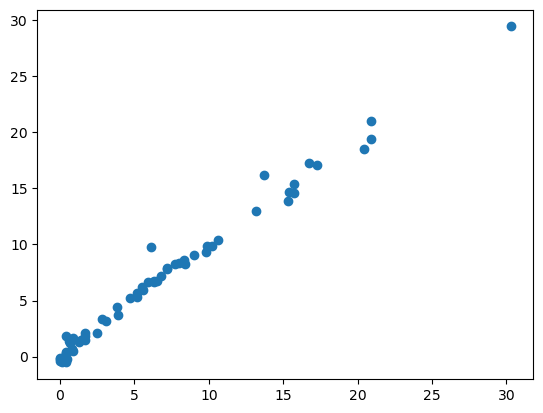

In [28]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_absolute_error

ridge_regression_model=Ridge()

ridge_regression_model.fit(X_train_transformed,y_train)

y_pred=ridge_regression_model.predict(X_test_transformed)

mae=mean_absolute_error(y_test,y_pred)

score=r2_score(y_test,y_pred)

print("Mean absolute error :",mae)
print("R2 score :",score)

plt.scatter(y_test,y_pred)

ElasticNet Regression Model

Mean absolute error : 1.8822353634896
R2 score : 0.8753460589519703


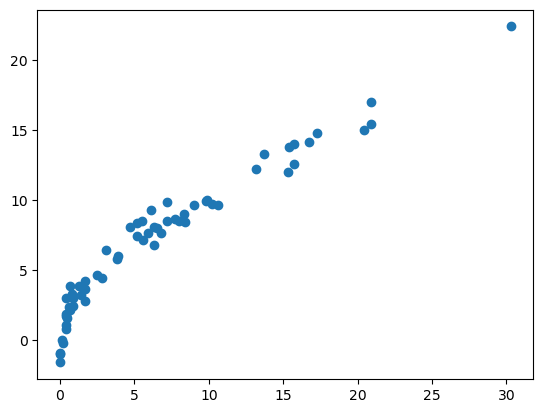

In [29]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error

en_regression_model=ElasticNet()

en_regression_model.fit(X_train_transformed,y_train)

y_pred=en_regression_model.predict(X_test_transformed)

mae=mean_absolute_error(y_test,y_pred)

score=r2_score(y_test,y_pred)

print("Mean absolute error :",mae)
print("R2 score :",score)

plt.scatter(y_test,y_pred)

Model Training of all regression model completed 

Model Pickling 


In [34]:
ridge_regression_model

Ridge()

In [35]:
scaler

StandardScaler()

In [36]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge_regression_model,open('ridge_regression_model.pkl','wb'))

Pickling Completed